# Heart Disease Prediction
The dataset is being downloaded from Kaggle.Here is the link: (https://www.kaggle.com/ronitf/heart-disease-uci) In this project I have used Machine Learning algorithm in order to predict whether the person is suffering from heart disease or not.

## Importing Libraries
In the below block some libraries are imported.For data visualization **Matplotlib** is used whereas **sklearn** library is also imported after some blocks of code which is used for Machine Learning.

# Machine Learning Algorithms
There are total 3 Machine Learning Algorithms used in this project \
1) Support Vector Classifier \
2) Decision Tree Classifier \
3) Random Forest Classifier 

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from matplotlib.cm import rainbow

In [200]:
data = pd.read_csv('dataset.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [201]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


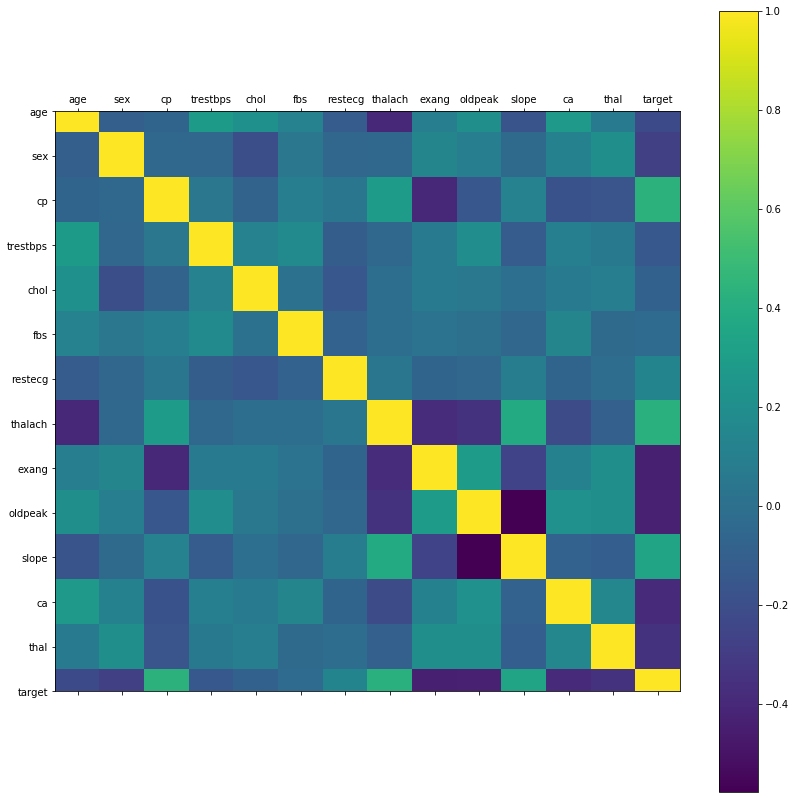

In [203]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

Text(0.5, 1.0, 'Count of each Target Class')

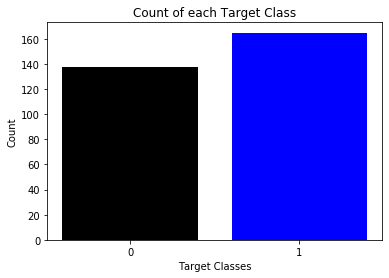

In [204]:
rcParams['figure.figsize'] = 6,4
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['blue', 'black'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [205]:
for i in data:
    print("Total unique values in ",i, " column are :", data[i].nunique())

Total unique values in  age  column are : 41
Total unique values in  sex  column are : 2
Total unique values in  cp  column are : 4
Total unique values in  trestbps  column are : 49
Total unique values in  chol  column are : 152
Total unique values in  fbs  column are : 2
Total unique values in  restecg  column are : 3
Total unique values in  thalach  column are : 91
Total unique values in  exang  column are : 2
Total unique values in  oldpeak  column are : 40
Total unique values in  slope  column are : 3
Total unique values in  ca  column are : 5
Total unique values in  thal  column are : 4
Total unique values in  target  column are : 2


In [206]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [208]:
scaler = StandardScaler()
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[cols] = scaler.fit_transform(data[cols])

In [209]:
X = data.drop(['target'], axis = 1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [210]:
print("Total training examples are: ",X_train.shape[0])
print("Total testing examples are: ",X_test.shape[0])

Total training examples are:  203
Total testing examples are:  100


In [211]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report

# Support Vector Classifier
In below block, SVC is used along with different kernels like 'rbf','linear','poly','sigmoid' and hence scores of all different kernels are calculated.The best score of kernel is selected for further classification report.

In [212]:
#SVC
svc_scores = []
kernel = ['rbf','linear','poly','sigmoid']

for i in range(len(kernel)):
    model_svc = SVC(kernel = kernel[i])
    model_svc.fit(X_train,y_train)
    svc_scores.append(model_svc.score(X_test,y_test)*100)
    ans = max(svc_scores)
print("Maximum Score by using various kernels of SVM model in percentage is:",ans)

cnt = 0
for i in svc_scores:
    if i == ans:
        main_kernel = kernel[cnt]
    else:
        cnt = cnt + 1

Maximum Score by using various kernels of SVM model in percentage is: 83.0


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

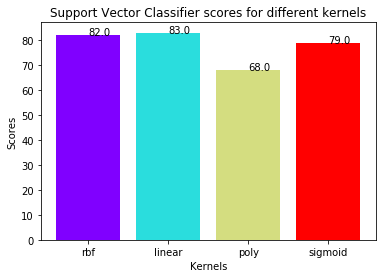

In [213]:
colors = rainbow(np.linspace(0, 1, len(kernel)))
plt.bar(kernel, svc_scores, color = colors)
for i in range(len(kernel)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [214]:
model_svc = SVC(kernel = main_kernel)
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)
target_names = ['class-0','class-1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class-0       0.83      0.81      0.82        48
     class-1       0.83      0.85      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



# Decision  Tree Classifier
In the below block of code, Decision Tree Classifier is used along with some of the hyperparameters which are required to obtain good score.The best hyperparameters are selected which are further used in classification report.  

In [216]:
#Decision Tree
dtc_scores = []
for i in range(1,len(X.columns) + 1):
    dtc_model = dtc(splitter='random',max_depth=8,max_features = i,random_state=0)
    dtc_model.fit(X_train,y_train)
    dtc_scores.append(dtc_model.score(X_test,y_test)*100)
    ans = max(dtc_scores)
print("Maximum Score by using various features of Decision Tree model in percentage is:",ans)

cnt = 1
for i in dtc_scores:
    if i == ans:
        max_features = cnt
    else:
        cnt = cnt + 1

Maximum Score by using various features of Decision Tree model in percentage is: 84.0


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

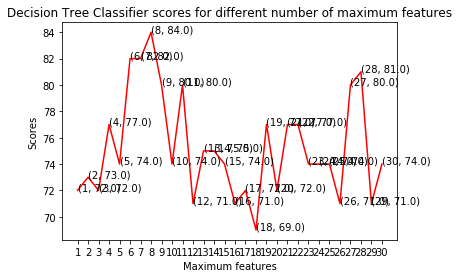

In [217]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dtc_scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dtc_scores[i-1], (i, dtc_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Maximum features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [218]:
dtc_model = dtc(splitter='random',max_depth=8,max_features = max_features,random_state=0)
dtc_model.fit(X_train,y_train)
y_pred = dtc_model.predict(X_test)
target_names = ['class-0','class-1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class-0       0.88      0.77      0.82        48
     class-1       0.81      0.90      0.85        52

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [219]:
#Grid Search CV for finding best hyper-parameters for Decision Tree Classifier
#sc = StandardScaler()
dt = dtc()
pipe = Pipeline(steps=[('decisiontree', dt)])
criterion = ['gini', 'entropy']
splitter = ['best','random']
max_depth = [4,6,8,12]
max_features = list((range(1,len(X.columns) + 1)))
params = dict(decisiontree__criterion=criterion,
              decisiontree__splitter=splitter,
              decisiontree__max_depth=max_depth,
              decisiontree__max_features=max_features)
clf = GridSearchCV(pipe,params)
clf.fit(X_train,y_train)
print('Best Criterion:',clf.best_estimator_.get_params()['decisiontree__criterion'])
print('Best Splitter:',clf.best_estimator_.get_params()['decisiontree__splitter'])
print('Best Depth:', clf.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Maximum Features:', clf.best_estimator_.get_params()['decisiontree__max_features'])
print(clf.best_estimator_.get_params()['decisiontree'])
ans = clf.score(X_test,y_test)*100
print("Best score using GridSearchCV on Decision Tree Model is:",ans)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Criterion: gini
Best Splitter: random
Best Depth: 12
Best Maximum Features: 18
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=18, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')
Best score using GridSearchCV on Decision Tree Model is: 67.0


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Random Forest Classifier
In below block of code,Random Forest Classifier is used with various number of estimators.These estimators are checked and the estimator which gives best score for model is further selected for classification report.

In [220]:
#Random Forest
rfc_scores = []
n_estimators = [10,50,100,150,200,300,400,450,500,950,1000]
for i in n_estimators:
    model_rfc = rfc(n_estimators = i,random_state=0)
    model_rfc.fit(X_train,y_train)
    rfc_scores.append(model_rfc.score(X_test,y_test)*100)
    ans = max(rfc_scores)
print("Maximum Score by using various number of estimators of Random Forest model in percentage is: ",ans)

cnt = 0
for i in rfc_scores:
    if i == ans:
        best_estimator = n_estimators[cnt]
        break
    else:
        cnt = cnt + 1

Maximum Score by using various number of estimators of Random Forest model in percentage is:  84.0


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

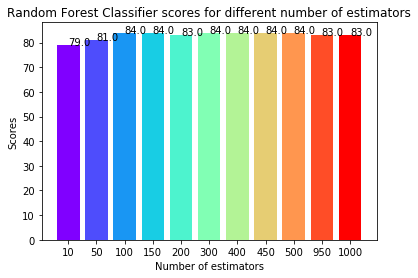

In [221]:
colors = rainbow(np.linspace(0, 1, len(n_estimators)))
plt.bar([i for i in range(len(n_estimators))], rfc_scores, color = colors, width = 0.8)
for i in range(len(n_estimators)):
    plt.text(i, rfc_scores[i], rfc_scores[i])
plt.xticks(ticks = [i for i in range(len(n_estimators))], labels = [str(estimator) for estimator in n_estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [222]:
model_rfc = rfc(n_estimators = best_estimator,random_state=0)
model_rfc.fit(X_train,y_train)
y_pred = model_rfc.predict(X_test)
target_names = ['class-0','class-1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class-0       0.82      0.85      0.84        48
     class-1       0.86      0.83      0.84        52

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



# Grid Search CV for SVM and Random Forest
Grid Search CV library is used here to select best parameters from both the SVM and Random Forest models and thereby calculating the score on test set by choosing those best parameters. 

In [223]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear','poly','sigmoid']
        }  
    },
    'random_forest': {
        'model': rfc(),
        'params' : {
            'randomforestclassifier__n_estimators': [10,50,100,150,200,300,400,450,500,950,1000]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [198]:
print("Scores after applying GridSearchCV on SVM model: ",best_estimators['svm'].score(X_test,y_test)*100)
print("Scores after applying GridSearchCV on Random Forest model: ",best_estimators['random_forest'].score(X_test,y_test)*100)

Scores after applying GridSearchCV on SVM model:  83.0
Scores after applying GridSearchCV on Random Forest model:  83.0
